In [ ]:
import os
os.getcwd()

# Ridge chewiness

   target moisture    fat  protein   carbs     ash  moisture  fiber
0            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
1            56.85  6.662  62.6988  20.491  4.2445    5.3937   0.51
2            57.16  6.662  62.6988  20.491  4.2445    5.3937   0.51
3            57.51  6.582  63.1788  19.861  3.9545    5.9137   0.51
4            57.24  6.582  63.1788  19.861  3.9545    5.9137   0.51
   Chewiness
0  38.049816
1  31.294988
2  39.494747
3  26.862429
4  38.977081
[ 5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3  3  3  3  3  3
  3  3  4  4  4  4]
12


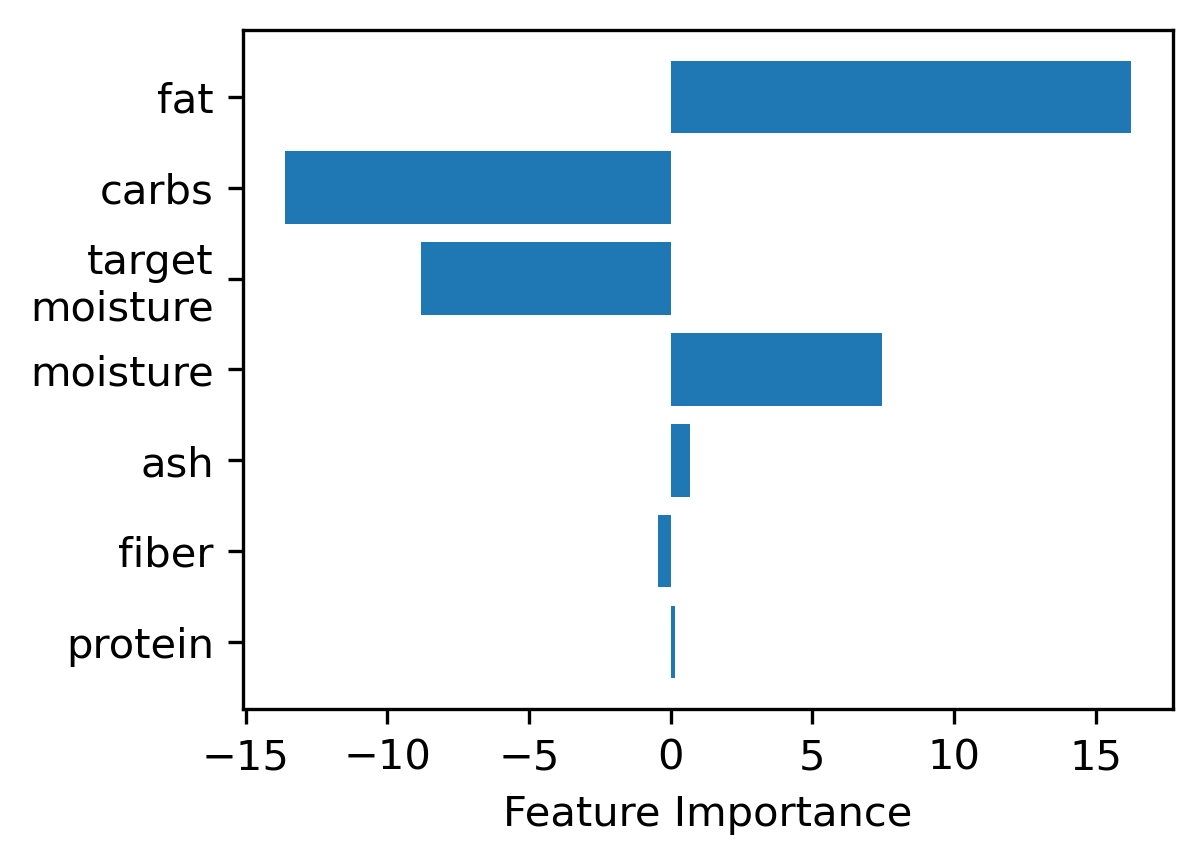

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
features_all=data.iloc[:,1:8]

response = 'chewiness'
if response=='crosswise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

reg = Ridge().fit(X_tr, y.ravel())

fig = plt.figure(figsize=(4,3), dpi=300)
ax = plt.axes()
# residual =  y_test.ravel()-prediction
# residuals_.append(residual)

sorted_indices = np.argsort(np.abs(reg.coef_))

#sorted_val = -np.sort(-reg.coef_)
features_all = features_all.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(features_all.columns[sorted_indices],reg.coef_[sorted_indices])

plt.xlabel('Feature Importance')

#plt.title('Ridge All_data'+ '('+response+')')
#plt.savefig('Chw_fs.pdf', bbox_inches='tight')
plt.show()





# Ridge

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeavePGroupsOut
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
data =pd.read_csv('./../Feature_Subsets/30_12_12.csv',header=0)
features_all=data.iloc[:,1:8]

response = 'hardness'
if response=='crosswise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,6:7])
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,6:7].head())

elif response=='lengthwise':
    X = np.array(features_all)
   # y = np.array(features_all.iloc[:,7:8])    
   # print(features_all.iloc[:, np.r_[0:1, np.r_[8:13,14:15]]].head())
   # print(features_all.iloc[:,7:8].head())    
    
elif response=='chewiness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,9:10])
    print(features_all.head())
    print(data.iloc[:,9:10].head())
elif response=='hardness':
    X = np.array(features_all)
    y = np.array(data.iloc[:,8:9])
    print(features_all.head())
    print(data.iloc[:,8:9].head())        
        
    
y_true, predictions, residuals = list(), list(), list()
loo = LeavePGroupsOut(n_groups=1)
groups = data.iloc[:,10:11].values.ravel()
study_id = data.iloc[:,0]

print(groups)
k_fold=loo.get_n_splits(X,groups=groups)
print(k_fold)


##feat=feature_comb[score_rmse.argsort()[0]]  # x th best feature
feat=[0,1,2,3,4,5,6] 
X = np.array(features_all.iloc[:,feat])
g_mse, g_mae, g_rmse, g_r2, g_r2adj,g_mape = list(),list(),list(),list(),list(),list()
count=0
predictions_, y_trues_ = list(), list()
labels= list()

count += 1
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

labels.extend(study_id)

# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

reg = Ridge().fit(X_tr, y.ravel())

fig = plt.figure(figsize=(4,3), dpi=300)
ax = plt.axes()
# residual =  y_test.ravel()-prediction
# residuals_.append(residual)

sorted_indices = np.argsort(np.abs(reg.coef_))

#sorted_val = -np.sort(-reg.coef_)
features_all = features_all.rename(columns={"target moisture": "target\nmoisture"})

plt.barh(features_all.columns[sorted_indices],reg.coef_[sorted_indices])

plt.xlabel('Feature Importance')

#plt.title('Ridge All_data'+ '('+response+')')
#plt.savefig('Hard_fs.pdf', bbox_inches='tight')
plt.show()





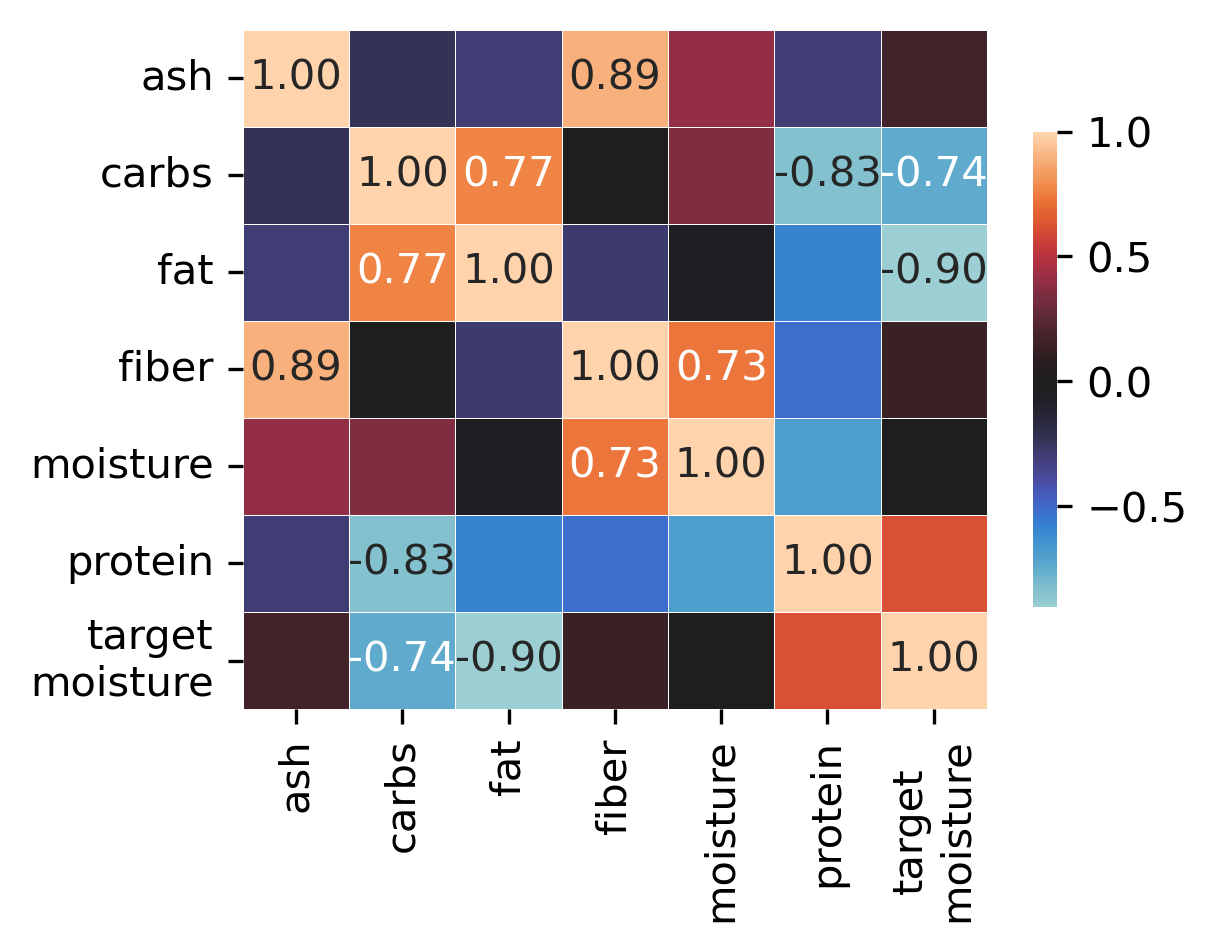

In [18]:
import seaborn as sns

fig = plt.figure(figsize=(4,3), dpi=300)
ax = plt.axes()
data = data.rename(columns={"target moisture": "target\nmoisture"})

sns.heatmap(data.loc[:,['ash','carbs','fat','fiber','moisture','protein','target\nmoisture']].corr(),linewidths=.2, annot=True, cbar_kws={"shrink": .70},vmax=1.0, center=0, fmt='.2f',ax=ax)
for t in ax.texts:
    if np.abs(float(t.get_text()))>=0.7:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("")
plt.savefig('Correlations.pdf', bbox_inches='tight')
